In [77]:
import numpy as np
# mpld3.enable_notebook()
import glob
import pandas as pd
import os
import datetime
import matplotlib
%matplotlib tk
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
# mpld3.enable_notebook()
# plt.switch_backend('QtAgg4')

In [293]:
%matplotlib widget

# Helium

In [2]:
files = glob.glob('Data/Paschen/Paschen*.txt')
heliumData = pd.DataFrame(columns = ['filename','p','p_err','d','d_err','V_B'])
for f in files:
    try:
        p = float(f.split('mT')[0].split('_')[1])
    except:
        p = float(f.split('mT')[0].split('\\Paschen')[1])
    fileInfo = {'filename': f,'p':p,'p_err':5.0,'d':None,'d_err':0.3,'V_B':None}
    t = os.path.getmtime(f)
    if t > 1634258142.0:
        fileInfo['d'] = 2.5
    elif t <= 1634687796.0:
        fileInfo['d'] = 13
w
    file = open(f, 'r')
    lines = file.readlines()
    
    count = 0
    # Strips the newline character
    V_B = -np.inf
    for line in lines:
        count += 1
        current, voltage, step =  line.split('\t')
        if float(current) > 0.005:
            V_B = max(V_B, float(voltage))
    print(f,V_B)
    fileInfo['V_B'] = V_B
    heliumData = heliumData.append(fileInfo, ignore_index = True)
    # print(t,datetime.datetime.fromtimestamp(t),f)
    # heliumData.to_excel("heliumData_Paschen.xlsx")  


Data/Paschen\Paschen240mT_1.txt -275.875445
Data/Paschen\Paschen240mT_2.txt -276.282266
Data/Paschen\Paschen240mT_3.txt -276.23162
Data/Paschen\Paschen240mT_4.txt -276.235215
Data/Paschen\Paschen240mT_5.txt -276.2446
Data/Paschen\Paschen240mT_6.txt -276.427299
Data/Paschen\Paschen322mT_1.txt -341.924455
Data/Paschen\Paschen322mT_2.txt -265.313096
Data/Paschen\Paschen322mT_3.txt -264.315271
Data/Paschen\Paschen322mT_4.txt -262.716012
Data/Paschen\Paschen322mT_5.txt -261.716741
Data/Paschen\Paschen322mT_6.txt -260.870419
Data/Paschen\Paschen405mT_1.txt -253.185092
Data/Paschen\Paschen405mT_2.txt -253.27508
Data/Paschen\Paschen405mT_3.txt -254.823103
Data/Paschen\Paschen405mT_4.txt -2.905536
Data/Paschen\Paschen405mT_5.txt -253.373493
Data/Paschen\Paschen408mT_1.txt -252.447319
Data/Paschen\Paschen411mT_1.txt -250.763265
Data/Paschen\Paschen475e-1mT_1.txt -551.439306
Data/Paschen\Paschen475e-1mT_2.txt -561.936333
Data/Paschen\Paschen475e-1mT_3.txt -551.622688
Data/Paschen\Paschen475e-1mT_

In [21]:
# heliumData.to_excel("heliumData_Paschen.xlsx")  

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
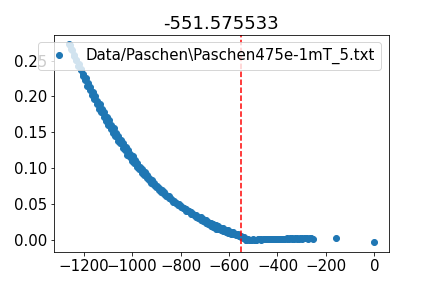

In [294]:
f = 'Data/Paschen\Paschen475e-1mT_5.txt'
file = open(f, 'r')
lines = file.readlines()

df = pd.read_table(f,names = ['current','voltage','_'])

count = 0
# Strips the newline character
V_B = -np.inf
for line in lines:
    count += 1
    # print("Line {}: {}".format(count, line.split('\t')))
    current, voltage, step =  line.split('\t')
    if float(current) > 0.005:
        # print(current, voltage, step)
        V_B = max(V_B, float(voltage))
        # print(V_B, float(voltage))
plt.figure()
plt.plot(df['voltage'],df['current'],'o',label=f)
plt.axvline(V_B,c='r',linestyle='dashed')
plt.legend() 
plt.title(V_B)
plt.show()  

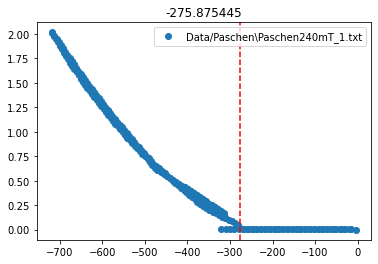

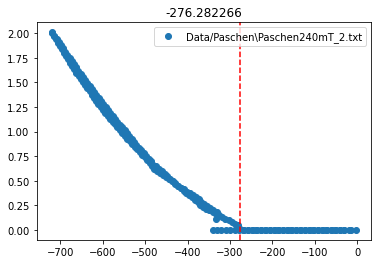

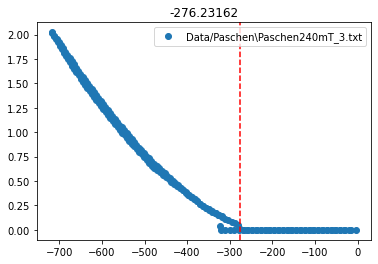

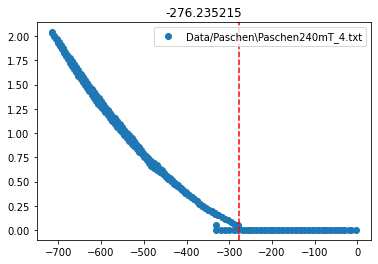

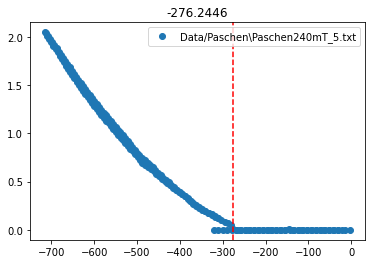

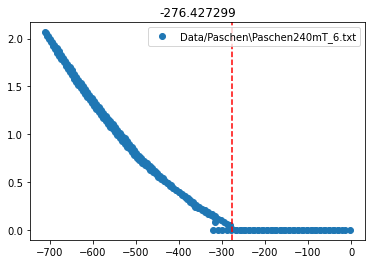

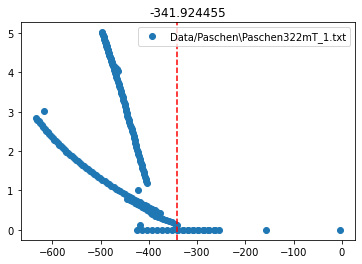

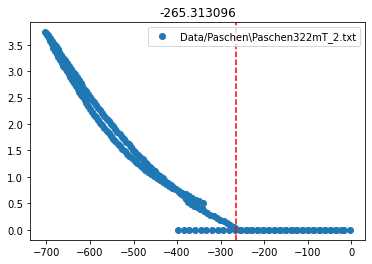

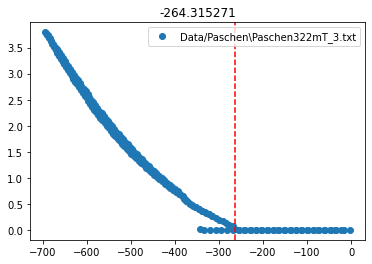

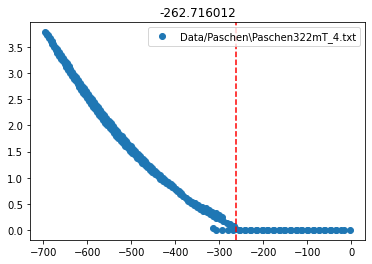

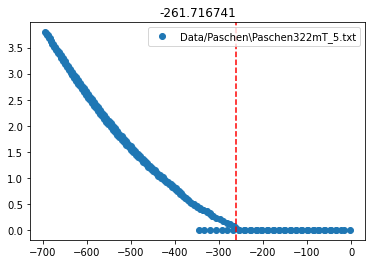

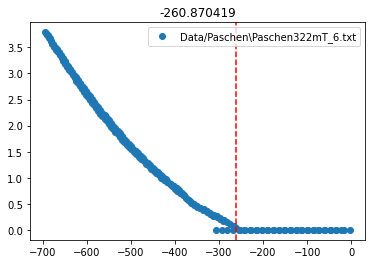

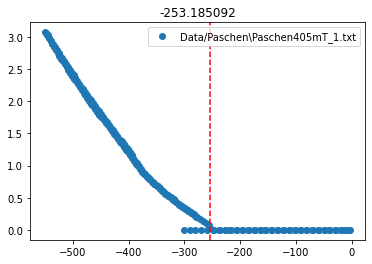

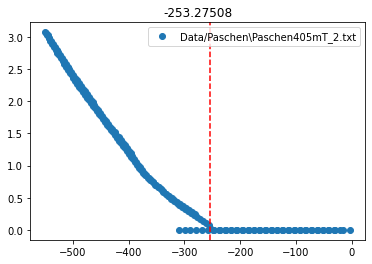

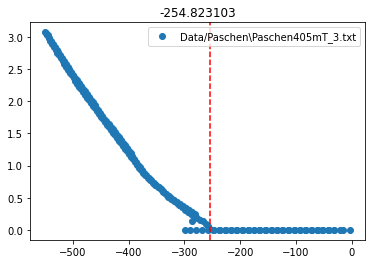

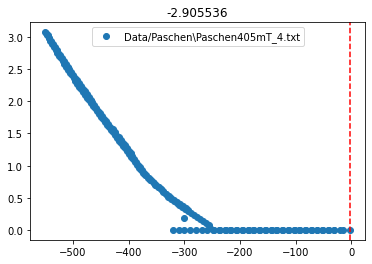

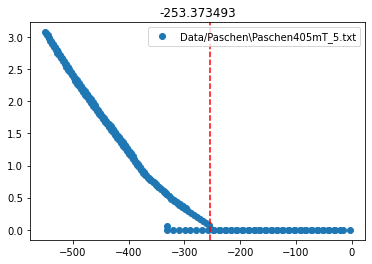

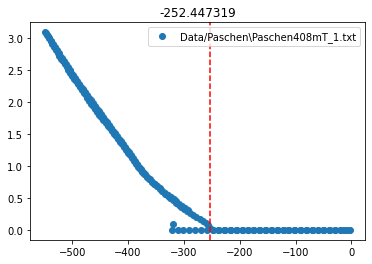

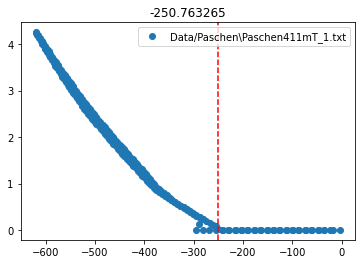

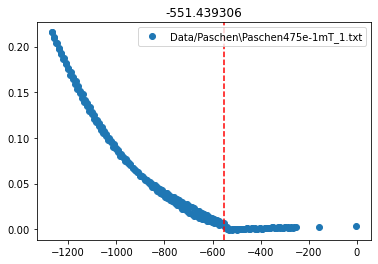

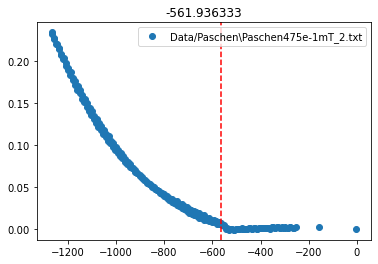

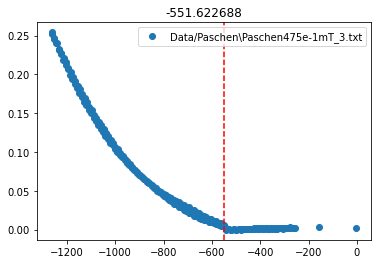

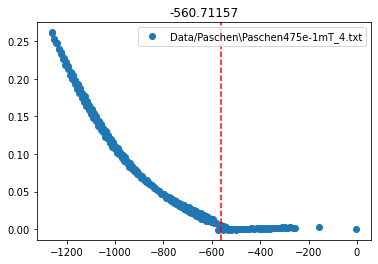

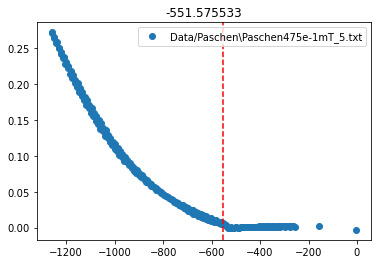

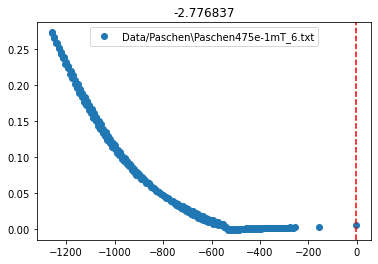

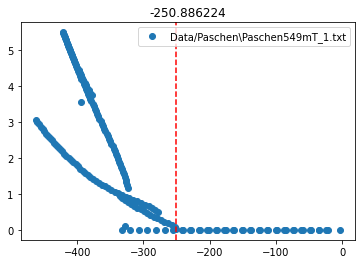

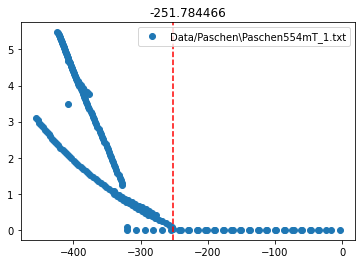

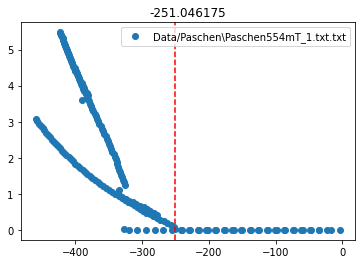

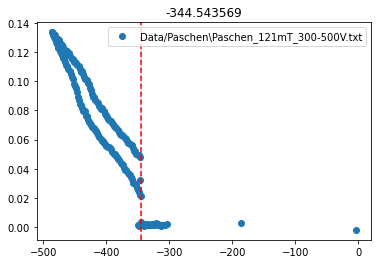

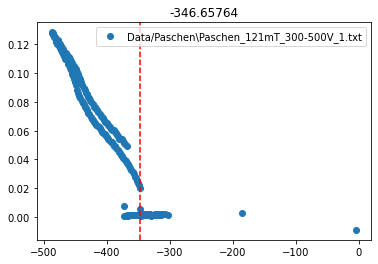

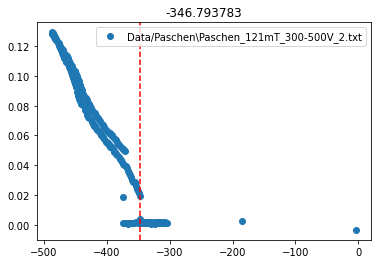

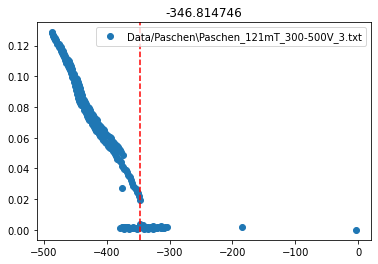

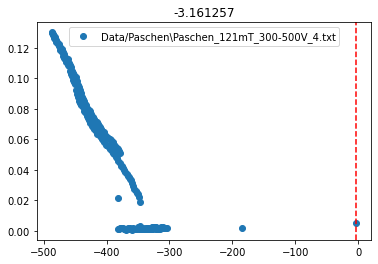

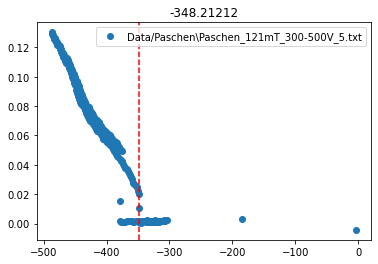

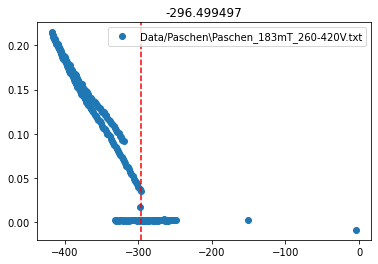

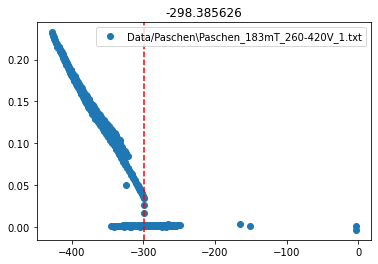

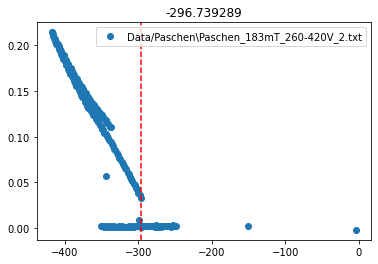

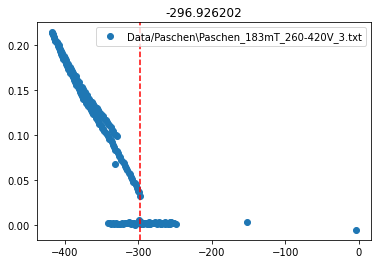

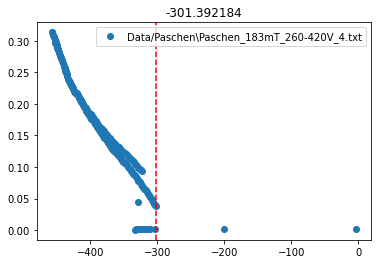

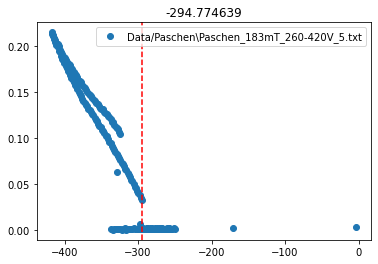

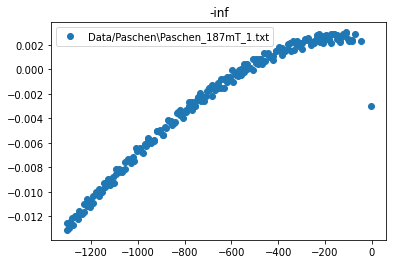

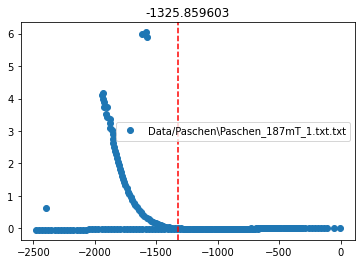

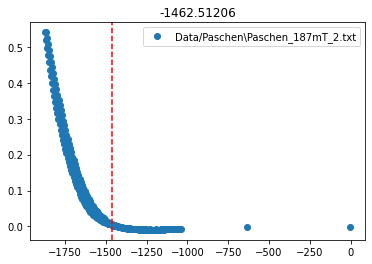

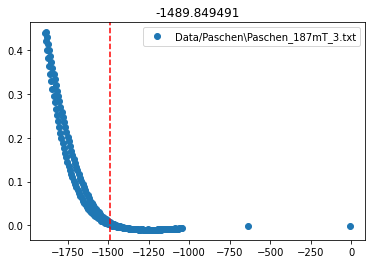

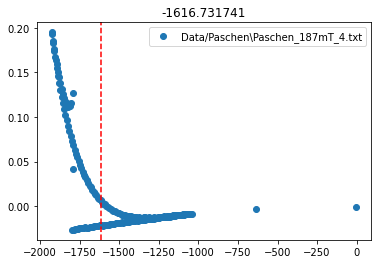

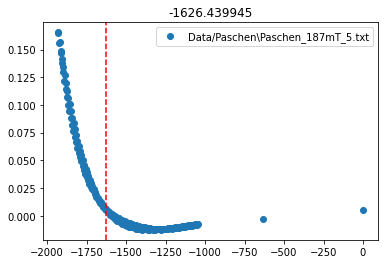

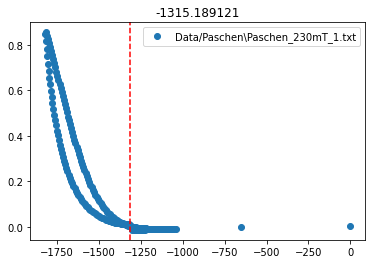

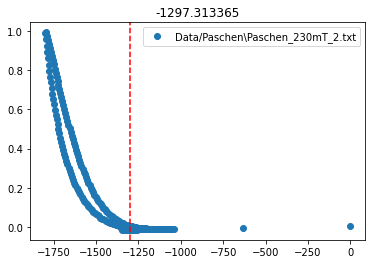

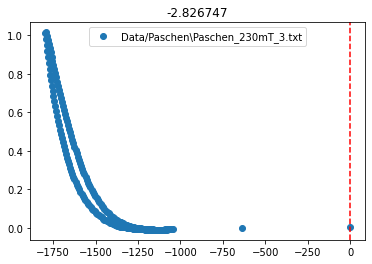

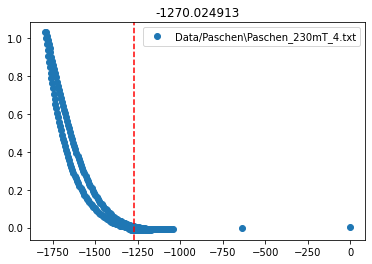

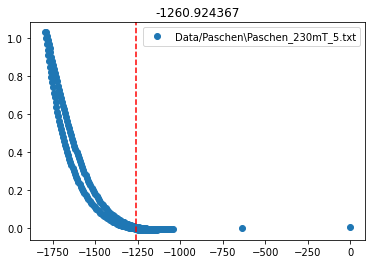

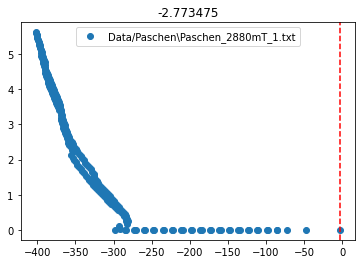

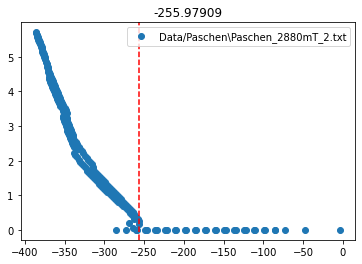

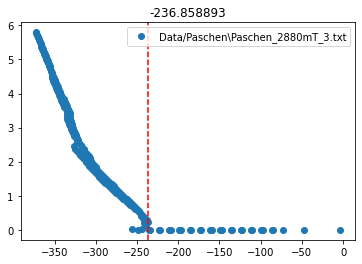

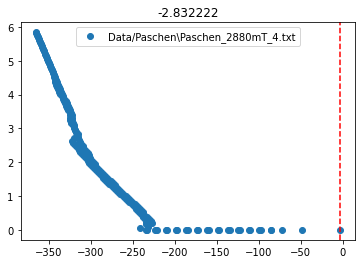

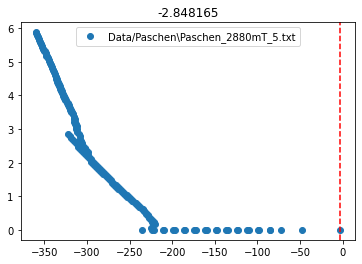

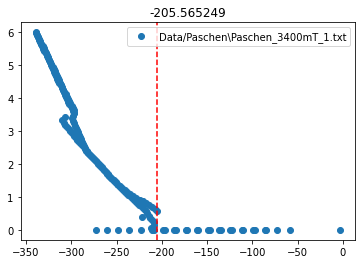

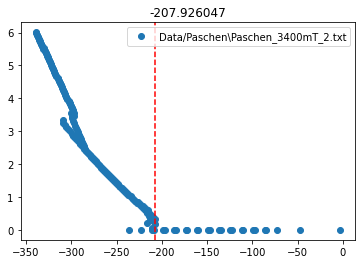

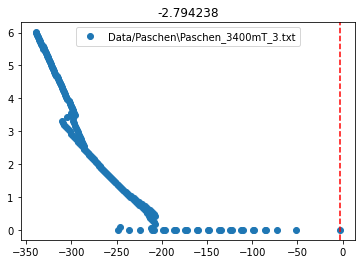

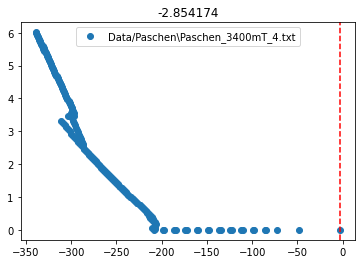

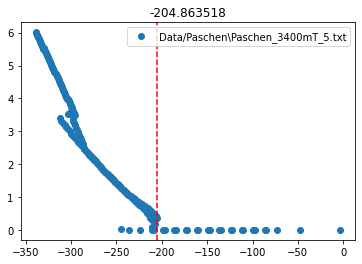

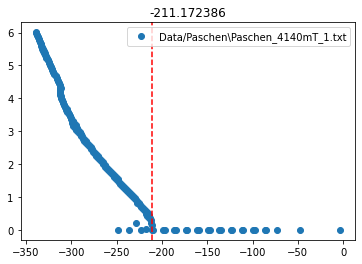

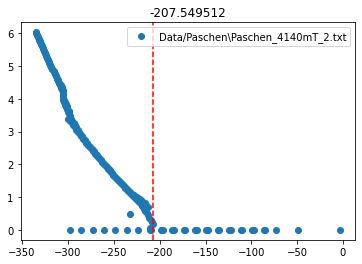

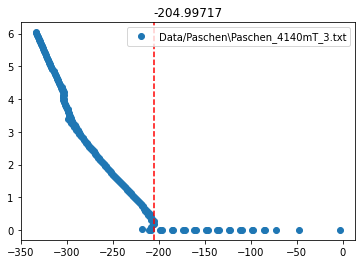

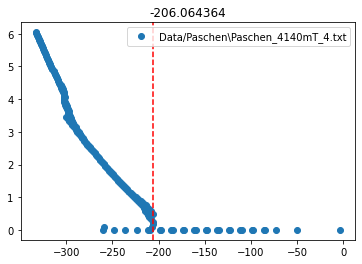

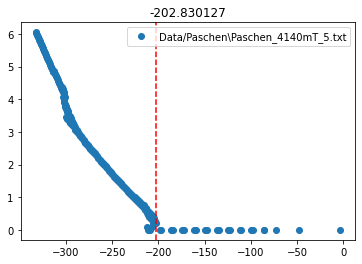

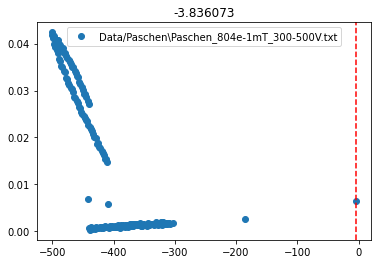

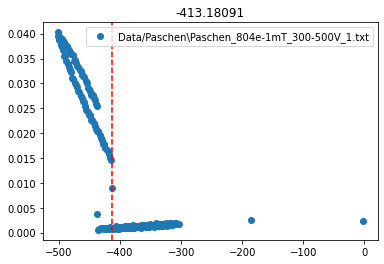

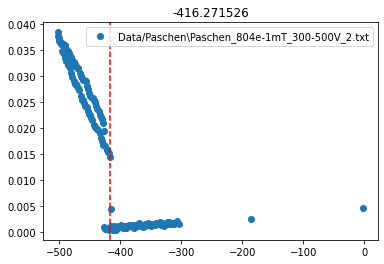

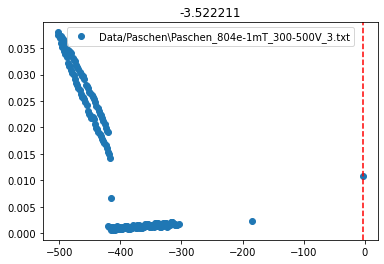

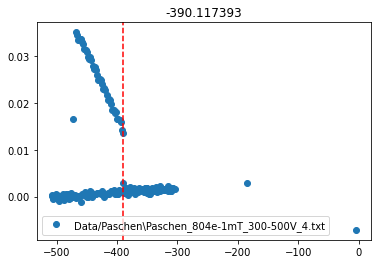

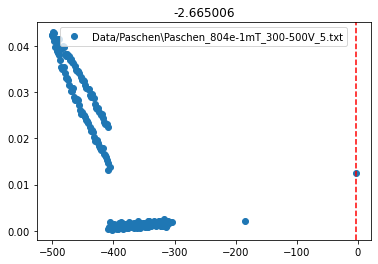

In [18]:
for f in files:
    # Using readlines()
    file = open(f, 'r')
    lines = file.readlines()
    
    df = pd.read_table(f,names = ['current','voltage','_'])

    count = 0
    # Strips the newline character
    V_B = -np.inf
    # V_B2 = -np.inf
    for line in lines:
        count += 1
        # print("Line {}: {}".format(count, line.split('\t')))
        current, voltage, step =  line.split('\t')
        if float(current) > 0.005:
            # print(current, voltage, step)
            V_B = max(V_B, float(voltage))
            # print(V_B, float(voltage))
    plt.figure()
    plt.plot(df['voltage'],df['current'],'o',label=f)
    plt.axvline(V_B,c='r',linestyle='dashed')
    plt.legend() 
    plt.title(V_B)
    plt.show()

In [14]:
import math

In [276]:
def breakdownVoltage(PD, A, B, gamma):
    # cm and Torr
    C = np.log(A * PD) - np.log(np.log(1 + 1./gamma))
    return B * PD / C

def find_xlim(A, gamma):
    return np.log(1+1/gamma) / A

In [277]:
heliumPaschen = pd.read_table('heliumPaschenCleaned.txt',names=['p','d','v','v_err'])

In [278]:
P = heliumPaschen['p'].astype('float').values / 1000
D = heliumPaschen['d'].astype('float').values
PD = P * D 
volts = heliumPaschen['v'].astype('float').values
volts_err = heliumPaschen['v_err'].astype('float').values + 10.
PD_err = PD * np.sqrt((5 /1000/P)**2+ (0.3/D)**2)

In [279]:
xlim

0.2519743834893188

In [284]:
xlim = find_xlim(3, 0.015) + 0.01
xrange = np.linspace(xlim,max(PD),100)
theoretical_volts = breakdownVoltage(xrange,3,34,0.015)

In [285]:
xlim

1.4148645634578927

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
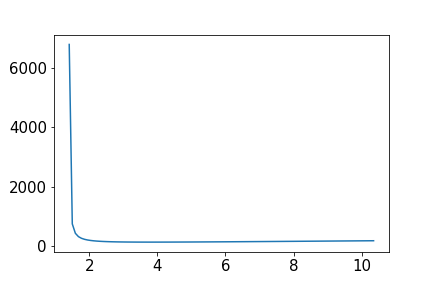

In [286]:
%matplotlib qt
plt.plot(xrange,theoretical_volts)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
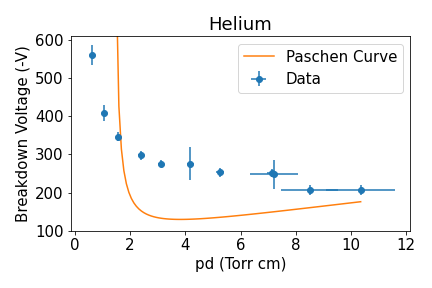

In [287]:
plt.figure()
plt.errorbar(PD,-volts,yerr=volts_err,xerr=PD_err,fmt='o',label='Data')
plt.plot(xrange,theoretical_volts,label='Paschen Curve')
plt.ylabel('Breakdown Voltage (-V)')
plt.xlabel('pd (Torr cm)')
plt.title('Helium')
plt.ylim(100,610)
plt.legend()
# plt.plot(xrange,theoretical_volts)
plt.tight_layout()

# Argon

In [85]:
files = glob.glob('Data/Paschen/Argon*.txt')
argonData = pd.DataFrame(columns = ['filename','p','p_err','d','d_err','V_B'])
for f in files:
    p = float(f.split('mT')[0].split('_')[-1])
    fileInfo = {'filename': f,'p':p,'p_err':5.0,'d':None,'d_err':0.3,'V_B':None}
    t = os.path.getmtime(f)
    fileInfo['d'] = 7.5
    
    file = open(f, 'r')
    lines = file.readlines()
    count = 0
    # Strips the newline character
    V_B = -np.inf
    for line in lines:
        count += 1
        current, voltage, step =  line.split('\t')
        if float(current) > 0.005:
            V_B = max(V_B, float(voltage))
    if V_B > -50:
        count = 0
        V_B = -np.inf
        for line in lines:
            count += 1
            current, voltage, step =  line.split('\t')
            if float(current) > 0.01:
                V_B = max(V_B, float(voltage))
    print(f,V_B)
    fileInfo['V_B'] = V_B
    argonData = argonData.append(fileInfo, ignore_index = True)
    # print(t,datetime.datetime.fromtimestamp(t),f)
    # heliumData.to_excel("heliumData_Paschen.xlsx")  


Data/Paschen\Argon_121mTrange50-1000V.txt -428.682993
Data/Paschen\Argon_131mTrange50-1000V.txt -456.902625
Data/Paschen\Argon_137mTrange50-1000V.txt -456.997681
Data/Paschen\Argon_282mTrange50-1000V.txt -347.946876
Data/Paschen\Argon_282mTrange50-1000V_2.txt -345.990704
Data/Paschen\Argon_364mTrange50-1000V_1.txt -288.536175
Data/Paschen\Argon_364mTrange50-1000V_2.txt -292.710202
Data/Paschen\Argon_364mTrange50-1000V_3.txt -285.555266
Data/Paschen\Argon_364mTrange50-1000V_4.txt -284.627274
Data/Paschen\Argon_364mTrange50-1000V_5.txt -281.372597
Data/Paschen\Argon_364mTrange50-1000V_6.txt -280.558068
Data/Paschen\Argon_536mTrange200-600V_1.txt -276.568297
Data/Paschen\Argon_536mTrange50-1000V_1.txt -318.782177
Data/Paschen\Argon_71mTrange200-600V_1.txt -462.779885
Data/Paschen\Argon_71mTrange200-600V_2.txt -465.40706
Data/Paschen\Argon_71mTrange200-600V_3.txt -465.954841
Data/Paschen\Argon_71mTrange200-600V_4.txt -472.092968
Data/Paschen\Argon_71mTrange200-600V_5.txt -473.105508
Data/P

In [86]:
argonData.to_excel("argonData_Paschen.xlsx")  
%matplotlib inline

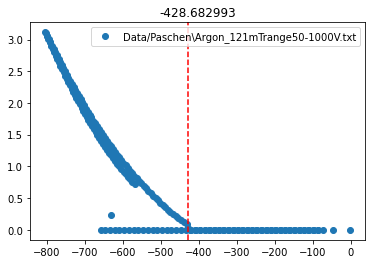

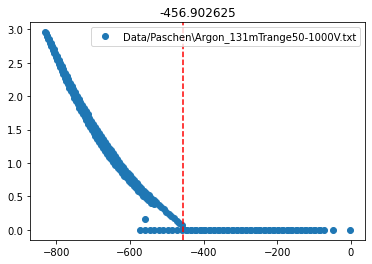

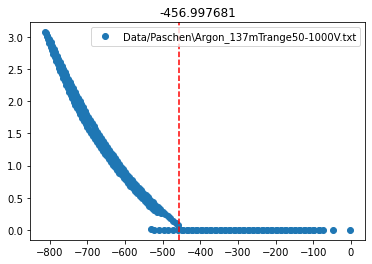

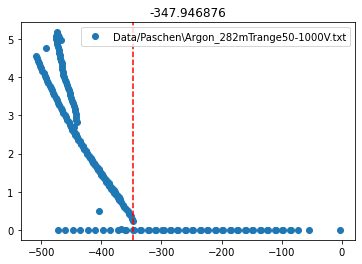

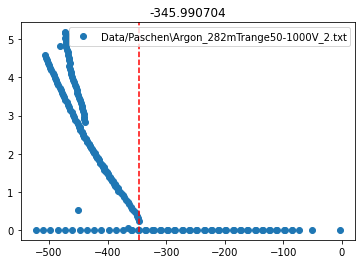

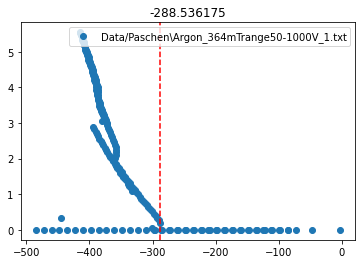

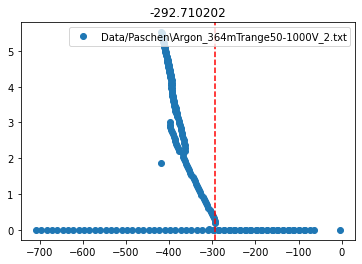

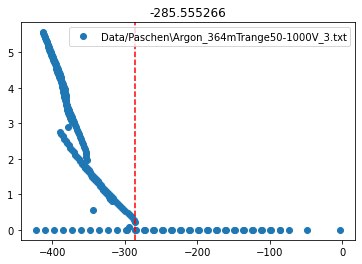

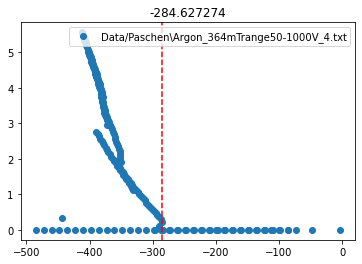

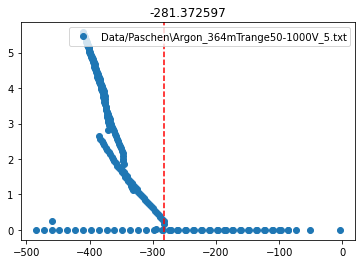

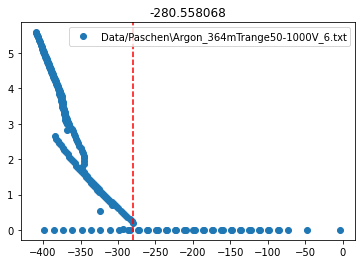

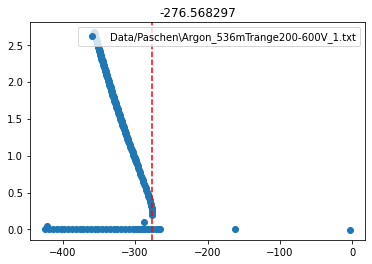

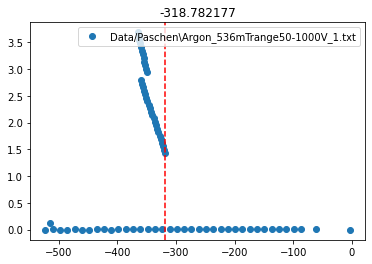

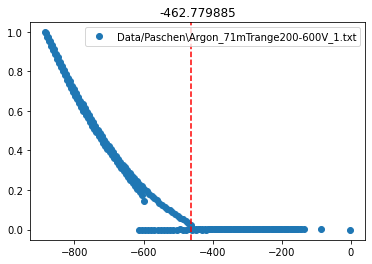

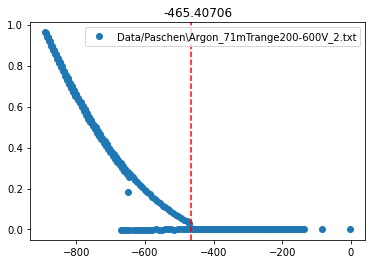

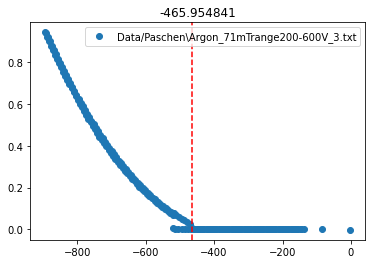

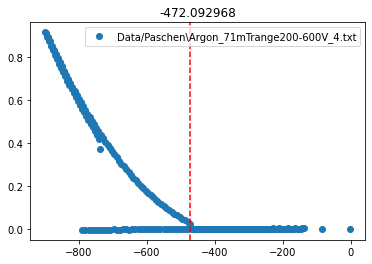

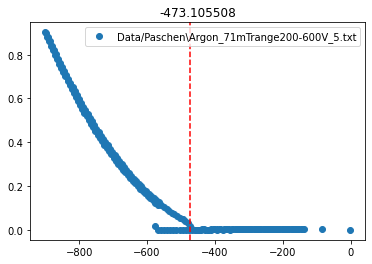

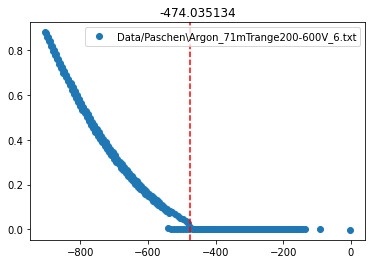

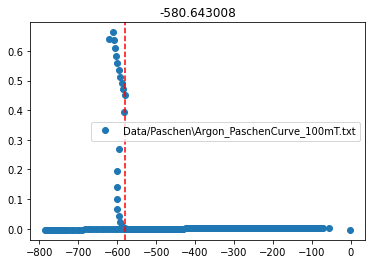

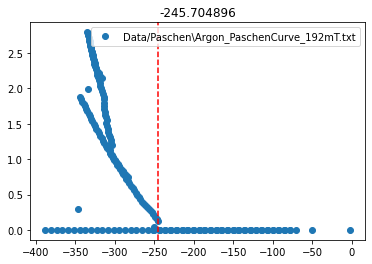

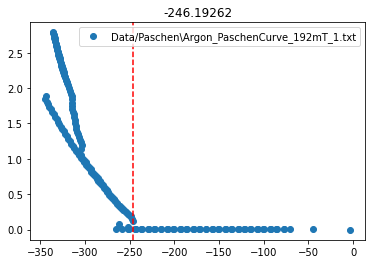

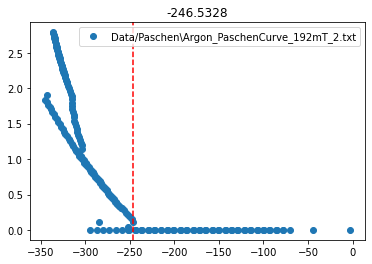

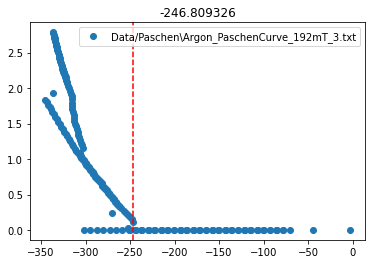

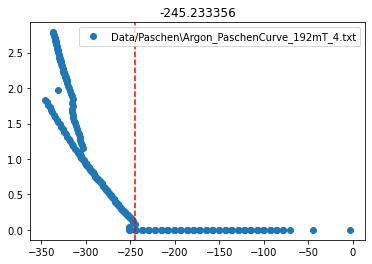

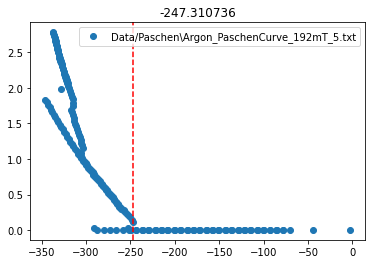

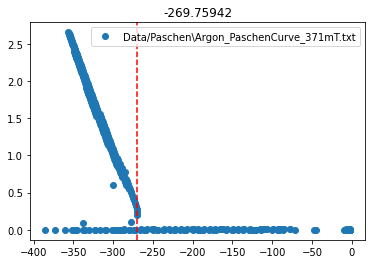

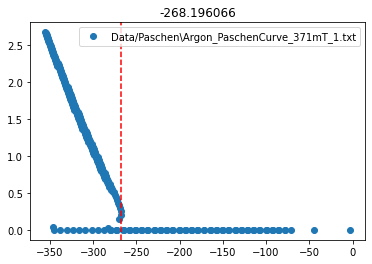

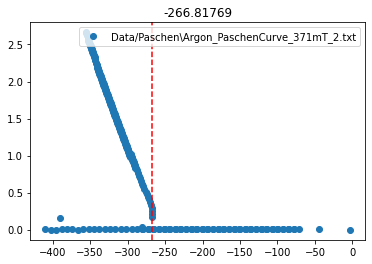

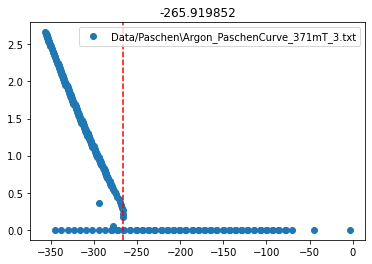

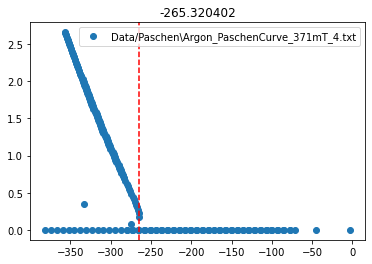

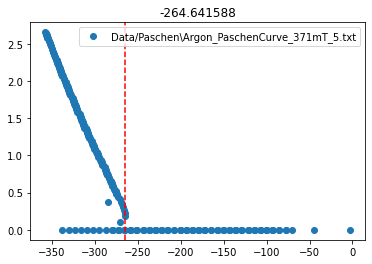

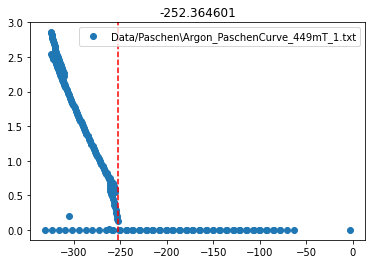

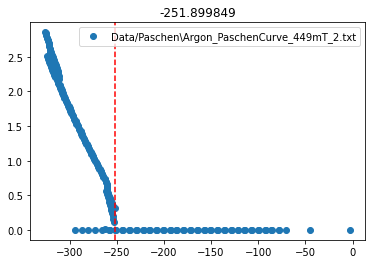

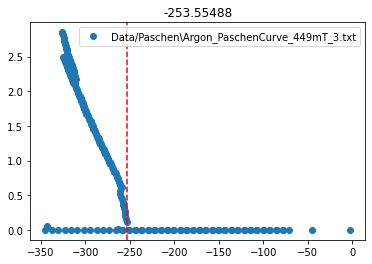

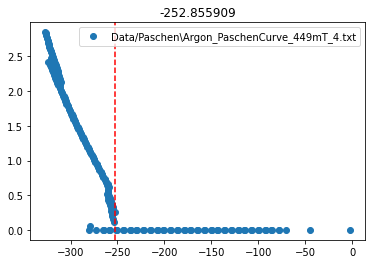

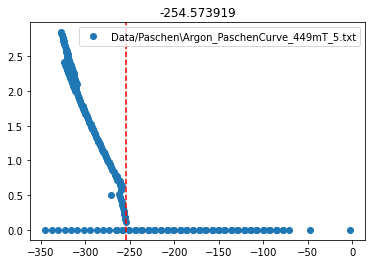

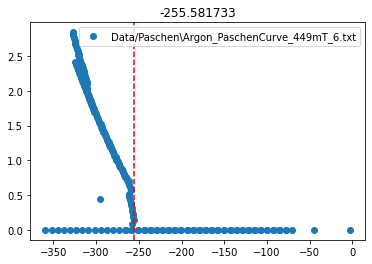

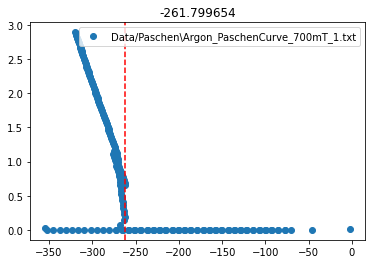

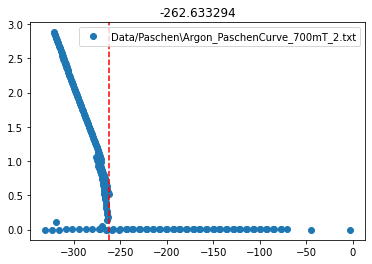

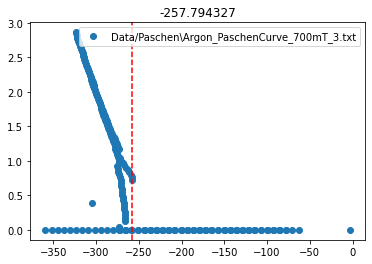

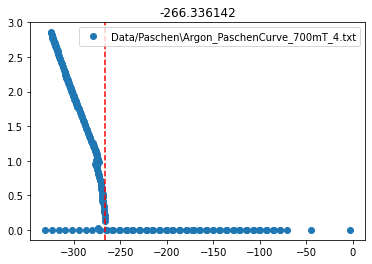

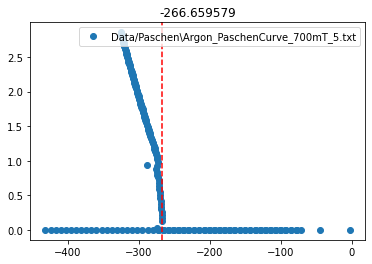

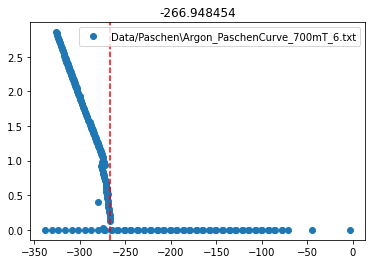

In [84]:
for f in files:
    # Using readlines()
    file = open(f, 'r')
    lines = file.readlines()
    
    df = pd.read_table(f,names = ['current','voltage','_'])

    count = 0
    # Strips the newline character
    V_B = -np.inf
    # V_B2 = -np.inf
    for line in lines:
        count += 1
        # print("Line {}: {}".format(count, line.split('\t')))
        current, voltage, step =  line.split('\t')
        if float(current) > 0.005:
            # print(current, voltage, step)
            V_B = max(V_B, float(voltage))
            # print(V_B, float(voltage))
    if V_B > -50:
        count = 0
        V_B = -np.inf
        for line in lines:
            count += 1
            current, voltage, step =  line.split('\t')
            if float(current) > 0.01:
                V_B = max(V_B, float(voltage))
    plt.figure()
    plt.plot(df['voltage'],df['current'],'o',label=f)
    plt.axvline(V_B,c='r',linestyle='dashed')
    plt.legend() 
    plt.title(V_B)
    plt.show()

In [288]:
argonPaschen = pd.read_table('argonPaschenCleaned.txt',names=['p','v','v_err'])

In [289]:
P = argonPaschen['p'].astype('float').values / 1000
PD = P * 7.5
volts = argonPaschen['v'].astype('float').values
volts_err = argonPaschen['v_err'].astype('float').values + 10.
PD_err = PD * np.sqrt((5/1000 /P)**2+ (0.3/7.5)**2)

In [290]:
xlim = find_xlim(12,0.058) + 0.01
xrange = np.linspace(xlim,np.max(PD)+0.5,1000)
theoretical_volts = breakdownVoltage(xrange,12,180,0.058)

In [291]:
matplotlib.rcParams['font.size']=15

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
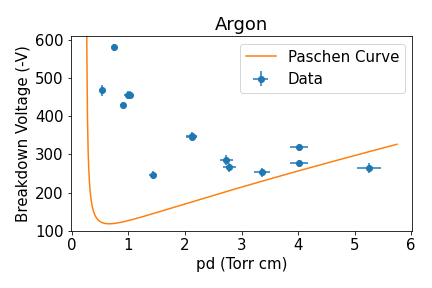

In [292]:
plt.figure()
plt.errorbar(PD,-volts,yerr=volts_err,xerr=PD_err,fmt='o',label='Data')
plt.plot(xrange,theoretical_volts,label='Paschen Curve')
plt.title('Argon')
plt.ylabel('Breakdown Voltage (-V)')
plt.xlabel('pd (Torr cm)')
plt.ylim(100,610)
plt.legend()
plt.tight_layout()